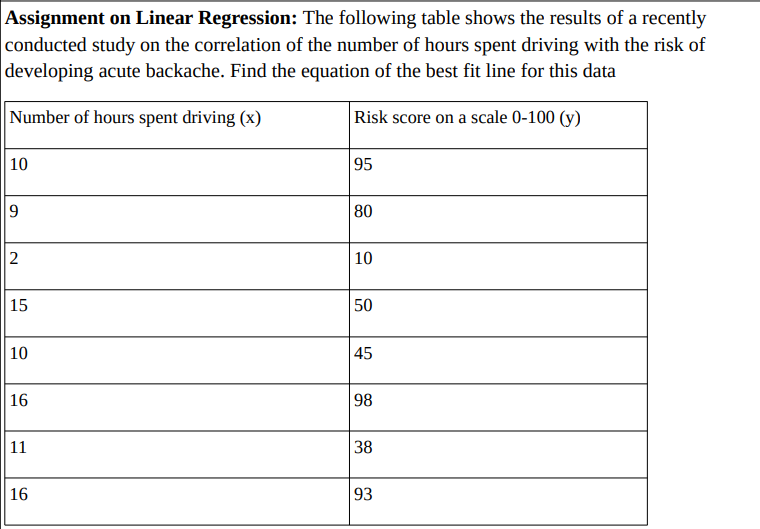

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [37]:
data = {
    "driving_hours": [10, 9, 2, 15, 10, 16, 11, 16],
    "risk_score": [95, 80, 10, 50, 45, 98, 38, 93]
}

df = pd.DataFrame.from_dict(data)
df.head()

,driving_hours,risk_score
0,10,95
1,9,80
2,2,10
3,15,50
4,10,45


In [38]:
def plotData(X, y, x_label="driving_score", y_label="risk_score"):
    plt.figure(figsize=(6,6))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(X, y)
    return plt

In [39]:
def plotRegressionLine(X, y, y_pred, x_label="driving_score", y_label="risk_score"):
    plt = plotData(X, y, x_label, y_label)
    plt.plot(X, y_pred, color="red", linewidth=3)
    plt.show()

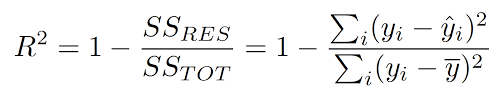

In [40]:
## Not necessary
def calcR2Score(X, y, y_pred):
    y_mean = y.mean()
    SStot = sum((y-y_mean)**2)
    SSres = sum((y-y_pred)**2)
    r2_score = 1 - (SSres/SStot)
    return r2_score

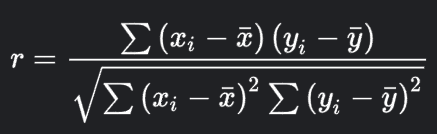

In [41]:
## Not necessary
def calcCorrelationCoeff(X, y):
    X_mean = X.mean()
    y_mean = y.mean()
    num = sum((X-X_mean)*(y-y_mean))
    den = (sum((X-X_mean)**2)*sum((y-y_mean)**2))**0.5
    coeff = num/den
    return coeff

In [42]:
X = np.array(df['driving_hours'])
y = np.array(df['risk_score'])

In [43]:
calcCorrelationCoeff(X, y)

0.6611314653759117

<module 'matplotlib.pyplot' from 'D:\\Program_Files\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

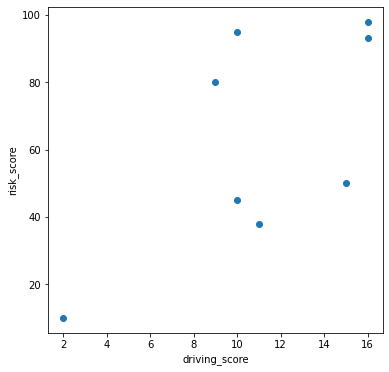

In [44]:
plotData(X, y)

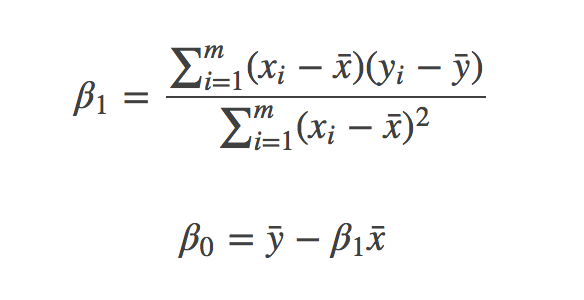

In [45]:
def calcCoefficients(X, y):
    X_mean = X.mean()
    y_mean = y.mean()
    coeff = sum((X-X_mean)*(y-y_mean))/sum((X-X_mean)**2)
    intercept = y_mean - coeff*X_mean
    return coeff, intercept

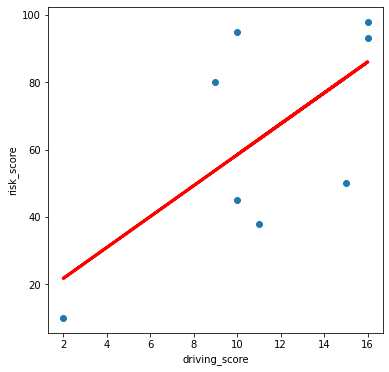

In [46]:
W, W0 = calcCoefficients(X, y)
y_pred = W*X + W0
plotRegressionLine(X, y, y_pred)

In [47]:
print("Coefficient: ",W)
print("Intercept: ",W0)
print("R2 score: ",calcR2Score(X, y, y_pred))
print(f"Equation: Y = {W}*X+{W0}")

Coefficient:  4.58789860997547
Intercept:  12.584627964022893
R2 score:  0.43709481451010035
Equation: Y = 4.58789860997547*X+12.584627964022893


## Sklearn Implementation

In [48]:
X = np.array(X).reshape(-1, 1)

In [49]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [50]:
print("Coefficient: ",model.coef_[0])
print("Intercept: ",model.intercept_)
print("R2 score: ",calcR2Score(X, y, y_pred))
print(f"Equation: Y = {model.coef_[0]}*X+{model.intercept_}")

Coefficient:  4.587898609975469
Intercept:  12.584627964022907
R2 score:  0.43709481451010035
Equation: Y = 4.587898609975469*X+12.584627964022907


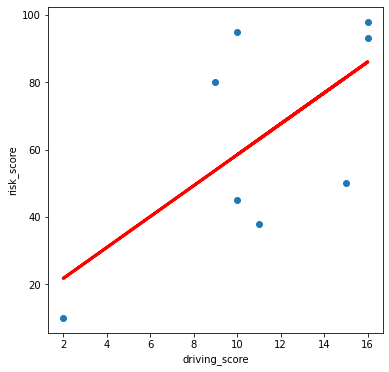

In [51]:
plotRegressionLine(X, y, y_pred)